This notebook allows the reproduce **Figure 4** of the paper "Covering the Combinatorial Design Space of Multiplex CRISPR/Cas Experiments in Plants" by Kirsten Van Huffel, Michiel Stock, Thomas Jacobs, Tom Ruttink and Bernard De Baets.

#### Load packages

In [1]:
using Random 
using Plots  
using Distributions 
using LinearAlgebra
using Combinatorics
using BioCCP


(process:2640): GLib-GIO-WARNING **: 10:22:39.949: Unexpectedly, UWP app `HaukeGtze.7-ZipFileManagerUnofficial_1.2107.2.0_x64__6bk20wvc8rfx2' (AUMId `HaukeGtze.7-ZipFileManagerUnofficial_6bk20wvc8rfx2!zFM.exe') supports 36 extensions but has no verbs


#### Load BioCCP- and simulation-based framework

In [2]:
include("MultiplexCrisprDOE.jl");

#### Set seed for reproducibility

In [3]:
Random.seed!(1)

TaskLocalRNG()

#### Study relation between expected plant library size for full coverage of all single gene knockouts and experimental design parameters

In [4]:
include("DefaultParameters_k=1.jl");

- Figure 4A: Vary the number of target genes

In [5]:
### default: 20 target genes
E_20_sim_single, sd_20_sim_single = simulate_Nₓ₁(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_20_bioccp_single, sd_20_bioccp_single = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### 10 target genes
x = 10
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_10_sim_single, sd_10_sim_single = simulate_Nₓ₁(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_10_bioccp_single, sd_10_bioccp_single = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### 30 target genes
x = 30
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_30_sim_single, sd_30_sim_single = simulate_Nₓ₁(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_30_bioccp_single, sd_30_bioccp_single = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### 40 target genes
x = 40
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_40_sim_single, sd_40_sim_single = simulate_Nₓ₁(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_40_bioccp_single, sd_40_bioccp_single = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

### 50 target genes
x = 50
n_gRNA_total = x * g
p_gRNA_freq = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize=true)
p_gRNA_edit = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false) 

E_50_sim_single, sd_50_sim_single = simulate_Nₓ₁(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

E_50_bioccp_single, sd_50_bioccp_single = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

(345, 100)

In [6]:
E_targets_sim_single = [E_10_sim_single, E_20_sim_single, E_30_sim_single, E_40_sim_single, E_50_sim_single]
E_targets_bioccp_single = [E_10_bioccp_single, E_20_bioccp_single, E_30_bioccp_single, E_40_bioccp_single, E_50_bioccp_single]
sd_targets_sim_single = [sd_10_sim_single, sd_20_sim_single, sd_30_sim_single, sd_40_sim_single, sd_50_sim_single]
sd_targets_bioccp_single = [sd_10_bioccp_single, sd_20_bioccp_single, sd_30_bioccp_single, sd_40_bioccp_single, sd_50_bioccp_single];

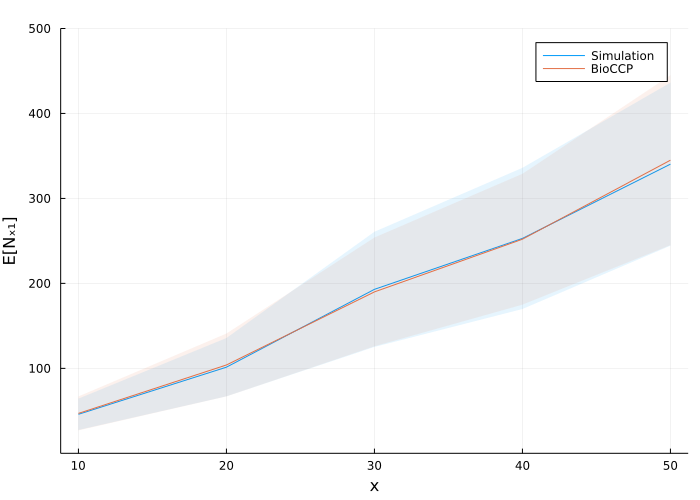

In [7]:
plot(collect(10:10:50), E_targets_sim_single, label="Simulation", 
    title="     ", xlabel="x", ylabel="E[Nₓ₁]",
    ribbon = sd_targets_sim_single, fillalpha=.1,
    xticks = (10:10:50, string.(10:10:50)),
    yticks = (100:100:600, string.(100:100:600)),
    ylim=(0, 500),
size = ((700,500)),
titlefont=font(11),
guidefontsize =11, guidefontfamily=101)

plot!(collect(10:10:50), E_targets_bioccp_single,  label="BioCCP",
    ribbon = sd_targets_bioccp_single, 
    fillalpha=.1,
)

- Figure 4B: Vary the global knockout efficiency

In [8]:
include("DefaultParameters_k=1.jl");  # reset to default values

In [9]:
## global knockout efficiency of 0.7
ϵ_KO = 0.7

E_p_KO70_bioccp_single, sd_p_KO70_bioccp_single = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO70_sim_single, sd_p_KO70_sim_single = simulate_Nₓ₁(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 0.8
ϵ_KO = 0.8

E_p_KO80_bioccp_single, sd_p_KO80_bioccp_single = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO80_sim_single, sd_p_KO80_sim_single = simulate_Nₓ₁(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 0.9
ϵ_KO = 0.9

E_p_KO90_bioccp_single, sd_p_KO90_bioccp_single = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO90_sim_single, sd_p_KO90_sim_single = simulate_Nₓ₁(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

## global knockout efficiency of 1
ϵ_KO = 1

E_p_KO100_bioccp_single, sd_p_KO100_bioccp_single = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit, ϵ_KO)

E_p_KO100_sim_single, sd_p_KO100_sim_single = simulate_Nₓ₁(x, 
                                g, 
                                r, 
                                n_gRNA_total, 
                                p_gRNA_freq, 
                                p_gRNA_edit, ϵ_KO; iter=500)

(84.69, 32.046338880929014)

In [10]:
E_p_KO_sim_single = [E_p_KO70_sim_single, E_p_KO80_sim_single, E_p_KO90_sim_single,E_p_KO100_sim_single]
E_p_KO_bioccp_single = [E_p_KO70_bioccp_single, E_p_KO80_bioccp_single, E_p_KO90_bioccp_single, E_p_KO100_bioccp_single]
sd_p_KO_sim_single = [sd_p_KO70_sim_single, sd_p_KO80_sim_single, sd_p_KO90_sim_single,sd_p_KO100_sim_single]
sd_p_KO_bioccp_single = [sd_p_KO70_bioccp_single, sd_p_KO80_bioccp_single, sd_p_KO90_bioccp_single, sd_p_KO100_bioccp_single];

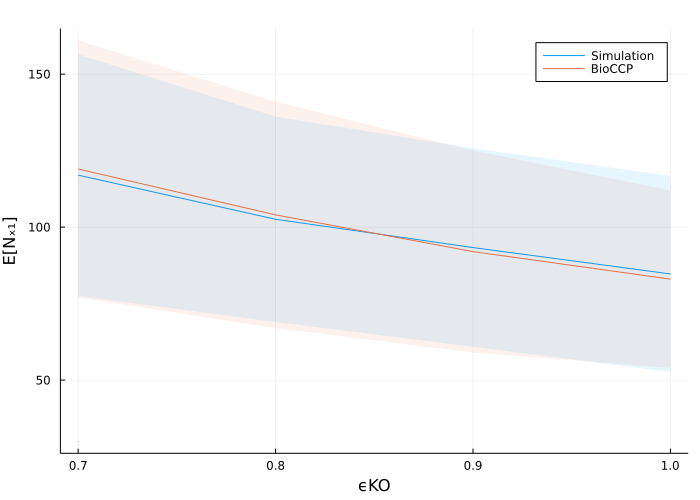

In [11]:
plot([0.7, 0.8, 0.9, 1], E_p_KO_sim_single, label="Simulation", 
    title="  ", xlabel="ϵKO", ylabel="E[Nₓ₁]",
    ribbon = sd_p_KO_sim_single, fillalpha=.1,
    xticks = ([0.7, 0.8, 0.9, 1], string.([0.7, 0.8, 0.9, 1])),
    yticks = (0:50:300, string.(0:50:300)),
size = ((700,500)),
titlefont=font(11),
guidefontsize =11, guidefontfamily=101)

plot!([0.7, 0.8, 0.9, 1], E_p_KO_bioccp_single,  label="BioCCP",
    ribbon = sd_p_KO_bioccp_single, 
    fillalpha=.1,
)

scatter!([0.7], [30], label="", markersize=0.00001)


- Figure 4C: Vary the gRNA frequency distribution through parameter ρ

In [12]:
include("DefaultParameters_k=1.jl");

In [13]:
iter = 15 # test 15 distributions with same ρ

### Default: ρ = 2
Es_p2_bioccp = zeros(iter, 6)
sds_p2_bioccp = zeros(iter, 6) 

for i in 1:iter # test different distributions with ρ = 2
    for g in 1:6 # vary number of gRNAs per gene
        n_gRNA_total = x * g 
        ρ  = 2; l = 50; u = 50*ρ 
        m = (l + u)/2
        sd = (l + u)/2
        p_gRNA_freq_2 = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize = true, visualize=false)
        p_gRNA_edit = ones(n_gRNA_total) # We assume genome editing efficiency of 1 for all gRNAs
        E, sd = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_2, 
                              p_gRNA_edit, ϵ_KO)
        Es_p2_bioccp[i,g] = E
        sds_p2_bioccp[i,g] = sd
    end
end
 
### ρ = 1
Es_p1_bioccp = zeros(iter, 6)
sds_p1_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6
    n_gRNA_total = x * g
    p_gRNA_freq_1 = ones(n_gRNA_total)/n_gRNA_total
    p_gRNA_edit = ones(n_gRNA_total)
    E, sd = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_1, 
                              p_gRNA_edit, ϵ_KO)
    Es_p1_bioccp[i,g] = E
    sds_p1_bioccp[i,g] = sd
    end
end

### ρ = 4
Es_p4_bioccp = zeros(iter, 6)
sds_p4_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6
    n_gRNA_total = x*g
    ρ = 4
    l = 50
    u = 50 * ρ 
    m= (l+u)/2
    sd = (l+u)/2
    p_gRNA_freq_4 = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize = true, visualize=false)
    p_gRNA_edit = ones(n_gRNA_total)
    E, sd = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_4, 
                              p_gRNA_edit, ϵ_KO)
    Es_p4_bioccp[i,g] = E
    sds_p4_bioccp[i,g] = sd
    end
end

### ρ = 8
Es_p8_bioccp = zeros(iter, 6)
sds_p8_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
    n_gRNA_total = x*g
    ρ  = 8
    l = 50; u = 50 * ρ;  m= (l + u)/2; sd = (l + u)/2
    p_gRNA_freq_8 = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize = true, visualize=false)
    p_gRNA_edit = ones(n_gRNA_total)
    E, sd = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_8, 
                              p_gRNA_edit, ϵ_KO)
    Es_p8_bioccp[i,g] = E
    sds_p8_bioccp[i,g] = sd
    end
end

### ρ = 16
Es_p16_bioccp = zeros(iter, 6)
sds_p16_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6
        ρ = 16; l = 50; u = 50*ρ ; m = (l + u)/2; sd = (l + u)/2
        n_gRNA_total = x * g
        p_gRNA_freq_16 = gRNA_frequency_distribution(m, sd, l, u, n_gRNA_total; normalize = true, visualize=false)
        p_gRNA_edit = ones(n_gRNA_total)
        E, sd= BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq_16, 
                              p_gRNA_edit, ϵ_KO)
        Es_p16_bioccp[i,g] = E
        sds_p16_bioccp[i,g] = sd
    end
end

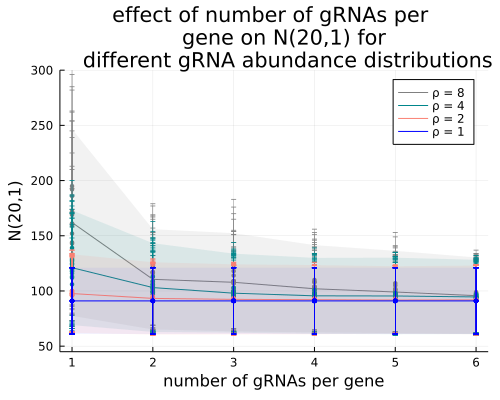

In [14]:
markersize = 2.5; markerstrokewidth=0.4
scatter(1:6, Es_p8_bioccp', errorbar=sds_p8_bioccp', color=:grey, label="",markersize=markersize, 
    markerstrokewidth=markerstrokewidth, markerstrokecolor=:grey
    )
plot!(1:6, mean(Es_p8_bioccp, dims=1)[:], color=:grey, ribbon=mean(sds_p8_bioccp, dims=1)[:],fillalpha=.1,
size = ((500,400)),label="ρ = 8", ylim=(45,300),
xlabel="number of gRNAs per gene", ylabel="N(20,1)", title="effect of number of gRNAs per 
    gene on N(20,1) for 
    different gRNA abundance distributions")

scatter!(1:6, Es_p4_bioccp', errorbar=sds_p4_bioccp', color=:turquoise4, label="",
    markersize=markersize, markerstrokewidth=markerstrokewidth, markerstrokecolor=:turquoise4)
plot!(1:6, mean(Es_p4_bioccp, dims=1)[:], color=:turquoise4, ribbon=mean(sds_p4_bioccp, dims=1)[:],  fillalpha=.1,
     yticks = (50:50:300, string.(50:50:300)),label="ρ = 4")

scatter!(1:6, Es_p2_bioccp', errorbar=sds_p2_bioccp', color=:salmon, label="",  markerstrokecolor=:salmon,
    markersize=markersize, markerstrokewidth=markerstrokewidth)
plot!(1:6, mean(Es_p2_bioccp, dims=1)[:], color=:salmon, ribbon=mean(sds_p2_bioccp, dims=1)[:],  fillalpha=.1, label="ρ = 2")

scatter!(1:6, Es_p1_bioccp', errorbar=sds_p1_bioccp', color=:blue, label="", markerstrokecolor=:blue,
    markersize=markersize, markerstrokewidth=markerstrokewidth ) #, markeralpha=0)
plot!(1:6, mean(Es_p1_bioccp, dims=1)[:], color=:blue, ribbon=mean(sds_p1_bioccp, dims=1)[:],  fillalpha=.05,
label="ρ = 1")

- Figure 4D: Vary fraction of all gRNAs that is active

In [15]:
include("DefaultParameters_k=1.jl");

In [16]:
iter = 15  # repeat for different gRNA genome editing distributions


Es_f7_bioccp = zeros(iter, 6)
sds_f7_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
    n_gRNA_total = x*g
    p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total # we assume equal distribution of gRNAs in construct library
    f_act = 0.7
    p_gRNA_edit_7 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  
    
    E, sd = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_7, ϵ_KO)
    Es_f7_bioccp[i,g] = E
    sds_f7_bioccp[i,g] = sd
    end
end

## f8
Es_f8_bioccp = zeros(iter, 6)
sds_f8_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6 # vary number of gRNAs per gene
    n_gRNA_total = x*g
    p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total # we assume equal distribution of gRNAs in construct library
    f_act = 0.8
    p_gRNA_edit_8 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  
    E, sd = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_8, ϵ_KO)
    Es_f8_bioccp[i,g] = E
    sds_f8_bioccp[i,g] = sd
    end
end

##f9 
### vary number of gRNAs per gene
Es_f9_bioccp = zeros(iter, 6)
sds_f9_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6
    n_gRNA_total = x*g
    p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total # we assume equal distribution of gRNAs in construct library
    f_act = 0.9
    p_gRNA_edit_9 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  

    E, sd = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_9, ϵ_KO)
    Es_f9_bioccp[i,g] = E
    sds_f9_bioccp[i,g] = sd
    end
end


### f_act = 1
Es_f1_bioccp = zeros(iter, 6)
sds_f1_bioccp = zeros(iter, 6) 
for i in 1:iter
    for g in 1:6
    n_gRNA_total = x*g
    p_gRNA_freq = ones(n_gRNA_total)/n_gRNA_total # we assume equal distribution of gRNAs in construct library
    f_act = 1
    p_gRNA_edit_1 = gRNA_edit_distribution(f_act, ϵ_edit_act, ϵ_edit_inact, sd_act, n_gRNA_total; visualize=false);  
    E, sd = BioCCP_Nₓ₁(x, 
                              g, 
                              r, 
                              n_gRNA_total, 
                              p_gRNA_freq, 
                              p_gRNA_edit_1, ϵ_KO)
    Es_f1_bioccp[i,g] = E
    sds_f1_bioccp[i,g] = sd
    end
end

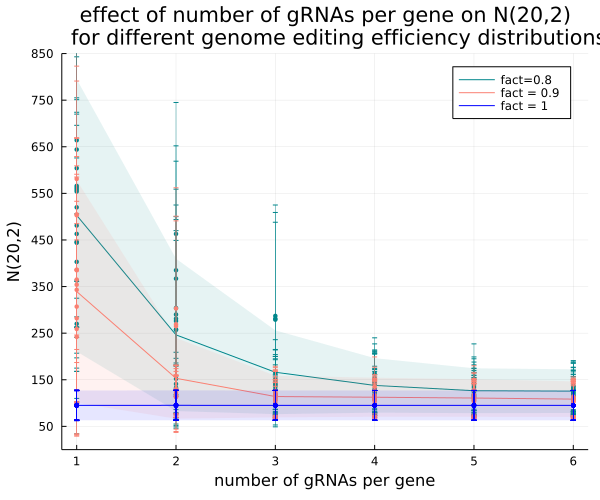

In [17]:
markersize = 2.5
markerstrokewidth=0.4

scatter(1:6, Es_f8_bioccp', errorbar=sds_f8_bioccp', color=:turquoise4, label="",
    markersize=markersize, markerstrokewidth=markerstrokewidth, markerstrokecolor=:turquoise4)
plot!(1:6, mean(Es_f8_bioccp, dims=1)[:], color=:turquoise4, ribbon=mean(sds_f8_bioccp, dims=1)[:],  fillalpha=.1,
     yticks = (50:100:850, string.(50:100:850)),
    label="fact=0.8",
        ylim=(0,850),
xlabel="number of gRNAs per gene", ylabel="N(20,2)", title="effect of number of gRNAs per gene on N(20,2)
    for different genome editing efficiency distributions")

scatter!(1:6, Es_f9_bioccp', errorbar=sds_f9_bioccp', color=:salmon, label="", 
    markersize=markersize, markerstrokewidth=markerstrokewidth, markerstrokecolor=:salmon)
plot!(1:6, mean(Es_f9_bioccp, dims=1)[:], color=:salmon, ribbon=mean(sds_f9_bioccp, dims=1)[:],  fillalpha=.1, label="fact = 0.9")

scatter!(1:6, Es_f1_bioccp', errorbar=sds_f1_bioccp', color=:blue, label="", 
    markersize=markersize, markerstrokewidth=markerstrokewidth, markerstrokecolor=:blue ) #, markeralpha=0)
plot!(1:6, mean(Es_f1_bioccp, dims=1)[:], color=:blue, ribbon=mean(sds_f1_bioccp, dims=1)[:],  fillalpha=.1,
size = ((600,500)),label="fact = 1")